#### Clarusway Python

* [Instructor Landing Page](landing_page.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb)

# SANDBOX (WEEK 3)

Continuing to explore collection types and control statements.

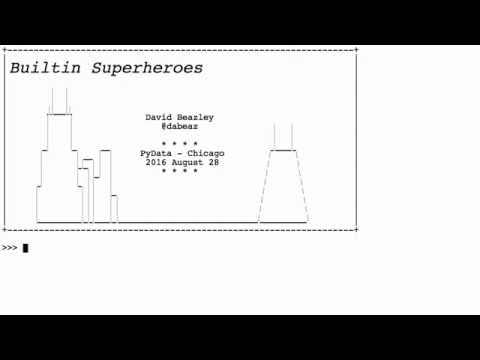

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("j6VSAsKAj98")

In the above Youtube, David Beazley introduced the namedtuple data type. It's in the collections module in the Standard Library.

Before we get into the namedtuple type (a bit exotic), lets talk about dicts and sets:

In [2]:
subset = {'empire of the ants',  # set of books
          'war of the worlds', 
          'the time machine'}

authors = {} # empty dict
authors['H.G. Wells'] = {"Born":1866,
                         "Died":1946,
                         "Writings":subset} # tiny subset
authors

{'H.G. Wells': {'Born': 1866,
  'Died': 1946,
  'Writings': {'empire of the ants', 'the time machine', 'war of the worlds'}}}

### The namedtuple type in collections

First, lets review alittle about importing: plunk "the whole suitcase" down on the bed (long-running analogy: module = suitcase) using `import` and/or import named contents, such as the sqrt function from math, or namedtuple from collections.

In [3]:
import collections  # <-- bring in a Python module

In [4]:
from math import sqrt  # <-- we have the option to just bring in named content

In [5]:
import math # <-- and, in addition, to have the module at hand

In [6]:
math.sqrt(10) # <-- I won't have to do this if I bring in sqrt

3.1622776601683795

OK now here's how we use namedtuple:

In [7]:
Atom = collections.namedtuple("Element", "protons mass symbol name")

![periodic table](https://sciencenotes.org/wp-content/uploads/2018/05/PeriodicTableMuted2018.png)

In [8]:
lithium = Atom(3, 6.941, "Li", "Lithium")
thorium = Atom(90, 232.038, "Th", "Thorium")

In [9]:
normal = (74, 183.84, 'W', 'Tungsten')

In [10]:
Worker = collections.namedtuple("Employee", "First Last Title DOB Hired")

We postpone doing much with dates and times until later when we start using the numpy package. The numpy package has its own implementation of the chrono types independently of what's in the Python Standard Library.

However, we need not avoid the Standard Library versions all together. Here we create some `datetime.date` instances in order to populate an employment record.

In [11]:
import datetime

In [12]:
datetime.date(2012, 3, 4)

datetime.date(2012, 3, 4)

In [13]:
emp1 = Worker("Kirby", "Urner", "Instructor", "10/31/2024", "1/1/2021")

In [14]:
emp1

Employee(First='Kirby', Last='Urner', Title='Instructor', DOB='10/31/2024', Hired='1/1/2021')

A whimsical combination of items, showing tuples (choosing from whatever we have so far) as values in a dict. Pythonistas often say dict instead of dictionary.

In [15]:
company = {"kirby":emp1, "lithium":lithium, "thorium":thorium}

In [16]:
company["lithium"]  # looking up a value by key in a dict

Element(protons=3, mass=6.941, symbol='Li', name='Lithium')

In [17]:
company.values()

dict_values([Employee(First='Kirby', Last='Urner', Title='Instructor', DOB='10/31/2024', Hired='1/1/2021'), Element(protons=3, mass=6.941, symbol='Li', name='Lithium'), Element(protons=90, mass=232.038, symbol='Th', name='Thorium')])

In [18]:
thorium[3]

'Thorium'

## Flow of Control

Copying from Sandbox 2:

The code cell below is a little bit ahead of where we are in the Notebooks, in that it uses two of Python's most critical control statements: the while and the if statements. 

Both keywords while and if start statements that might go various ways. For example the `else` keyword is optional with both. `if` may also include any number of `elif` suites, as we test this and that condition. 

The idea of a loop is to repeatedly run through the same code steps, perhaps each time altering some of the variables. The idea of an if statement is to flow differently, top to bottom, depending on what's currently happening with various variables. `break` and `continue` also have a role to play when it comes to loops.

In [19]:
"""
looping version, self quiz.
"""

import keyword

kws = keyword.kwlist[:5]

# cheat sheet
print(kws)  # comment out to not show the answers

def silly_game():
    """
    A while loop prompting a player to input a 
    keyword, which shortens the list until none
    are left or the player escapes using Q.
    """
    while len(kws) > 0:
        answer = input("Give me a keyword please > ")
        if answer.upper() == "Q":
            break
        if answer in kws:
            print("Excellent, thank you")
            kws.remove(answer)
            print("{} remaining".format(len(kws)))
        else:
            print("I couldn't find that in my list.")
    else:
        print("Wow, you got them all!")
    
    print("Thanks for playing!")


['False', 'None', 'True', 'and', 'as']


In [53]:
# silly_game()

In [21]:
L = ["this", "is", "a", "list"]
x = "list"
if x in L:
    L.remove("list")

In [22]:
L

['this', 'is', 'a']

In [23]:
x = 1 # assignment outside the loop
while x==1:
    print("Looping...")
    print("It's True!")
    if x==2: 
        print("before break")
        break
    x += 1
else:
    print("else suite")

Looping...
It's True!
else suite


#### Another exhibit...

In [55]:
from random import randint    

In [56]:
x = randint(0, 10)

while x != 10:
    print(x)
    x = randint(0, 10)
else:
    print("x is 10!")

5
5
4
6
4
6
0
7
9
x is 10!


In [131]:
pumpkin = "🎃"

def flipit():
    return ["heads", "tails"][randint(0, 1)]

def raining_pumpkins():
    all_lists = []           # empty list
    for _ in range(21):
        all_lists.append([]) # fill with 11 empty lists

    for _ in range(60):      # do this n times
        marker = 10          # depending where we start...
        for _ in range(10):  # ... and on how many flips... 
            coin = flipit()  # heads or tails?
            # marker ends up always even or odd
            if coin == "heads":
                marker -= 1
            else:
                marker += 1
        all_lists[marker].append(pumpkin)
            
    return all_lists

In [132]:
for _ in range(10):
    print(flipit(), end=" ")

tails tails heads heads heads tails heads heads tails tails 

In [134]:
lists = raining_pumpkins()
for row in lists[::2]:  # even or odd rows
    # print(row)
    print("".join(row))


🎃
🎃🎃🎃🎃🎃🎃🎃
🎃🎃🎃🎃🎃🎃
🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃
🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃
🎃🎃🎃🎃🎃🎃🎃🎃
🎃🎃🎃🎃🎃
🎃🎃
🎃🎃



### range type

In the curriculum proper, defined by lectures, Notebooks, labs, assignments and so on, we are just now getting to the `range` type, a useful sequence holder that behaves like a list yet doesn't need to use up memory the same way.

In the sandbox, as a way of previewing what's down the road, the numpy functions arange and linspace show what they provide that range does not. By comparing and contrasting the three together, we tie together data science in a more memorably compact way.

In [24]:
my_list = [1, 2, 3, 4, 5, 6]

In [25]:
ci = list(range(1, 11))
ci

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [26]:
ci[3:8]

[4, 5, 6, 7, 8]

In [27]:
len(range(1, 11))

10

We are just coming to for and while loops in the curriculum sequence, after some sandbox previewing:

In [28]:
for name in "this is just an ordinary string":
    print("{x} is the number".format(x = name))

t is the number
h is the number
i is the number
s is the number
  is the number
i is the number
s is the number
  is the number
j is the number
u is the number
s is the number
t is the number
  is the number
a is the number
n is the number
  is the number
o is the number
r is the number
d is the number
i is the number
n is the number
a is the number
r is the number
y is the number
  is the number
s is the number
t is the number
r is the number
i is the number
n is the number
g is the number


In [29]:
ci[0:9:2]

[1, 3, 5, 7, 9]

In [30]:
list(range(9, -1, -1))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [31]:
import numpy as np

In [32]:
np.pi

3.141592653589793

In [33]:
np.arange(0, 9.1, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. ])

In [34]:
np.linspace(0, 9, 10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [35]:
"hello %f, I like %d" % (475.01, 849)

'hello 475.010000, I like 849'

In [36]:
(3, )

(3,)

### JSON: JavaScript Object Notation

JavaScript and Python have quite a bit in common, especially when it comes to representing common data structures.

Shown below: opening this very notebook, reading it in as a gigantic string, and parsing it into a Python dictionary through the json string loader.

In [37]:
import json

In [38]:
# help(json)

In [39]:
def read_me():
    """
    if you would like to read in this very notebook
    as a json file and have it converted to a dict,
    run me
    """
    print("Running...")
    this_notebook = open("sandbox_week_03.ipynb", "r").read()
    notebook_dict = json.loads(this_notebook)
    print("Size:", len(this_notebook))
    return notebook_dict # this notebook as a dict, wow

In [40]:
sb3 = read_me()

Running...
Size: 174032


In [41]:
type(sb3)

dict

In [42]:
sb3.keys()

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

In [43]:
type(sb3['cells'])

list

In [44]:
sb3['cells'][0]

{'cell_type': 'markdown',
 'id': '41b0fa16-6ded-4217-9a30-f655af063525',
 'metadata': {'jp-MarkdownHeadingCollapsed': True},
 'source': ['#### Clarusway Python\n',
  '\n',
  '* [Instructor Landing Page](landing_page.ipynb)\n',
  '* <a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>\n',
  '* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/basic_python/sandbox_week_03.ipynb)']}

In [45]:
zoo = {"tiger":3, "turtle":99, "gorilla":2}

In [46]:
print(list(zoo.items()))
print(list(zoo.values()))

[('tiger', 3), ('turtle', 99), ('gorilla', 2)]
[3, 99, 2]


In [47]:
sen = tuple("I like Python")

In [48]:
sen = {1:"I", 2:"like", 3:"Python"}

In [49]:
sen

{1: 'I', 2: 'like', 3: 'Python'}

In [50]:
sen[3]

'Python'

In [51]:
"like" in sen.values()

True

In [52]:
# sb3  # <-- uncomment to dump the whole dict